# Homework 3

Spencer Pease  
ASTR 427

----------------------------

In [2]:
# Imports

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [44]:
# Bisection method

def bisection(a, b):
    """
    """
    c = (a + b)/2
    return c

In [45]:
# Newton-Raphson method

def newton(x0, f0, df0):
    """
    """
    x = x0 - (fx0/dfx0)
    return x

Simple test case:  
  
$x^{2} = z$

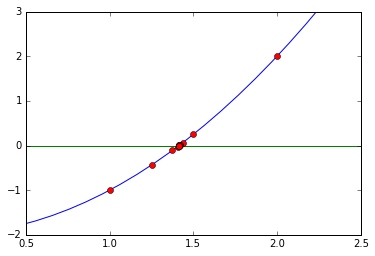

final value: 9.06325876713e-05
iterations: 16


In [43]:
# (a) bisection

z = 2
def f1(x):
    return x**2 - z

c_val = []
fc_val = []

a = -1.
b = 3.

i = 0
while np.abs(b - a) > 1e-4:
    i += 1
    c = bisection(a, b)
    fc = f1(c)
    
    c_val.append(c)
    fc_val.append(fc)
    
    if f1(a) * fc < 0:
        b = c
    elif f1(b) * fc < 0:
        a = c
    else:
        break

c_val = np.array(c_val)
fc_val = np.array(fc_val)

x = np.linspace(-5, 5, 100)

plt.xlim(.5, 2.5)
plt.ylim(-2, 3)
plt.plot(x, f1(x))
plt.plot(x, [0]*x)
plt.plot(c_val, fc_val, marker='o', linestyle='none')
plt.show()

print "final value:", fc_val[-1]
print "iterations:", i

In [ ]:
# (a) newton



Kepler's equation:  
  
$M = E - e\sin(E)$

In [ ]:
# (b)

## Problem 2